Nama  : Rizki Ramadhan

NIM   : 1103213091

Regression Model

# Import Library

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

Membaca file CSV

Prompt : buat kode untuk membaca file CSV ke dalam DataFrame.

In [69]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = 'RegresiUTSTelkom.csv'


# Membaca file CSV ke dalam DataFrame tanpa header
df = pd.read_csv(file_path, header=None)

# Menampilkan 5 baris pertama dari DataFrame
print(df.head())


     0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87    

Insight : informasi 5 baris pertama dataset, dataset ini terdiri dari 91 kolom, termasuk satu kolom penanda waktu atau kategori di kolom pertama, dan sisanya merupakan fitur numerik. Nilai-nilai pada kolom menunjukkan variasi yang signifikan, mencakup rentang angka positif dan negatif dengan skala yang cukup besar (misalnya, kolom ke-81 berkisar dari 13.01620 hingga -171.70734).

 Prompt:  Buatkan code untuk menambahkan header sementara untuk memudahkan akses ke kolom denga dinamai secara otomatis sebagai Feature_0, Feature_1, dst.

In [70]:
# Menambahkan header sementara untuk memudahkan akses ke kolom
df.columns = [f'Feature_{i}' for i in range(df.shape[1])]

# Menampilkan 5 baris pertama dari DataFrame
print(df.head())


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0       2001   49.94357   21.47114   73.07750    8.74861  -17.40628   
1       2001   48.73215   18.42930   70.32679   12.94636  -10.32437   
2       2001   50.95714   31.85602   55.81851   13.41693   -6.57898   
3       2001   48.24750   -1.89837   36.29772    2.58776    0.97170   
4       2001   50.97020   42.20998   67.09964    8.46791  -15.85279   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_81  Feature_82  \
0  -13.09905  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548   
1  -24.83777    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073   
2  -18.54940   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   
3  -26.21683    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   
4  -16.81409  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724   

   Feature_83  Feature_84  Feature_85  Feature_86  Feature_87  Feature_88  \
0    58.99367    15.37344  

Insight : Menambahkan header sementara untuk mempermudahkan akese ke kolom

Prompt: Buatkan code untuk mengambil sampel data misalnya 8000 untuk mempercepat proses pelatihan dan tuning

In [ ]:
# Mengambil sampel data sebanyak 8000 baris untuk mempercepat proses pelatihan dan tuning
df_sample = df.sample(n=8000, random_state=42)

# Menampilkan 5 baris pertama dari sampel DataFrameA
print(df_sample.head())


        Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
201297       2008   40.30215  -70.62097    3.12811    6.68963  -50.90846   
75576        2001   40.08585  -57.16520   29.52036    8.71885  -11.25987   
46834        2006   46.02711  -43.30633   15.18225   12.99382  -19.53041   
500468       2008   40.48860   57.43547  -18.10282    3.19062    2.00748   
90320        1998   41.89134   32.51783   34.62091   -4.69410    4.73619   

        Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_81  \
201297  -25.10912   26.17133   -3.84992   17.66655  ...    80.14465   
75576    -2.68790   -8.50474   -3.11885    9.75953  ...    28.66665   
46834    -9.44765   17.05382   -4.55165   -4.35176  ...   -14.36036   
500468   -2.08802    7.13638   17.86703   -1.60625  ...   -19.66716   
90320    -3.08271  -24.75868   -1.03929   -1.89214  ...    18.54887   

        Feature_82  Feature_83  Feature_84  Feature_85  Feature_86  \
201297    49.61628   -16.30317    -0.08766    

Insight : mengambil data sampel sebanyak 8000 data untuk mempercepat proses pelatihan, pipeline dan juga tuning

# Explanatory Data Analysis (EDA)
# Memahami karakteristik dataset dengan melihat informasi dasar dan statistik deskriptif

Prompt : Buatkan code untuk melakukan Explanatory Data Analysis seperti informasi dasar dataset, Statistik Deskriptif dan juga missing valuesnya

In [72]:
# Melakukan Explanatory Data Analysis (EDA)
# Informasi dasar dataset
print("Informasi dasar dataset:")
print(df_sample.info())

Informasi dasar dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 201297 to 407941
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   8000 non-null   int64  
 1   Feature_1   8000 non-null   float64
 2   Feature_2   8000 non-null   float64
 3   Feature_3   8000 non-null   float64
 4   Feature_4   8000 non-null   float64
 5   Feature_5   8000 non-null   float64
 6   Feature_6   8000 non-null   float64
 7   Feature_7   8000 non-null   float64
 8   Feature_8   8000 non-null   float64
 9   Feature_9   8000 non-null   float64
 10  Feature_10  8000 non-null   float64
 11  Feature_11  8000 non-null   float64
 12  Feature_12  8000 non-null   float64
 13  Feature_13  8000 non-null   float64
 14  Feature_14  8000 non-null   float64
 15  Feature_15  8000 non-null   float64
 16  Feature_16  8000 non-null   float64
 17  Feature_17  8000 non-null   float64
 18  Feature_18  8000 non-null   float64
 19  

Insight : Dataset ini terdiri dari 8000 entri dan 91 kolom, yang semuanya merupakan tipe data numerik (float64) kecuali satu kolom pertama. Tidak adanya nilai null menunjukkan bahwa dataset sudah bersih dan siap untuk dianalisis lebih lanjut

In [73]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df_sample.describe())


Statistik deskriptif:
         Feature_0    Feature_1    Feature_2    Feature_3    Feature_4  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean   1998.399625    43.502842     1.691354     8.926562     0.886095   
std      10.938699     6.019570    51.921426    34.700056    15.865213   
min    1929.000000     1.749000  -287.287360  -164.563050  -100.944550   
25%    1994.000000    40.055082   -25.514950   -11.154170    -8.727373   
50%    2002.000000    44.387890     8.742010    10.618645    -0.785780   
75%    2006.000000    47.804140    36.869750    29.305752     8.567410   
max    2010.000000    58.483620   182.620710   281.153890   118.036030   

         Feature_5    Feature_6    Feature_7    Feature_8    Feature_9  ...  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000  ...   
mean     -6.635673    -9.656860    -2.261605    -1.860409     3.870715  ...   
std      22.688105    12.787412    14.471103     7.717207    10.650746  .

Insight : Dataset ini memiliki 8000 entri dengan statistik deskriptif yang memberikan gambaran tentang distribusi nilai untuk setiap fitur. Nilai rata-rata dan standar deviasi menunjukkan adanya variasi yang cukup besar di antara fitur, seperti pada Feature_81 yang memiliki rata-rata sekitar 80, namun dengan standar deviasi yang sangat besar, yaitu 171.549967.

In [74]:
# Mengecek missing values
print("\nMissing values:")
print(df_sample.isnull().sum())



Missing values:
Feature_0     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
             ..
Feature_86    0
Feature_87    0
Feature_88    0
Feature_89    0
Feature_90    0
Length: 91, dtype: int64


Insight : Dataset ini tidak memiliki nilai yang hilang pada semua 91 kolom, yang memastikan data bersih dan siap untuk analisis lebih lanjut tanpa perlu langkah imputasi atau penanganan nilai kosong. Hal ini sangat menguntungkan untuk efisiensi dalam proses eksplorasi data, pelatihan model, dan tuning parameter, karena tidak ada risiko bias atau gangguan akibat data yang tidak lengkap.

# Menampilkan beberapa visualisasi dasar


Prompt: Membuat visualisasi dasar untuk memahami distribusi data sebanyak 5 fitur

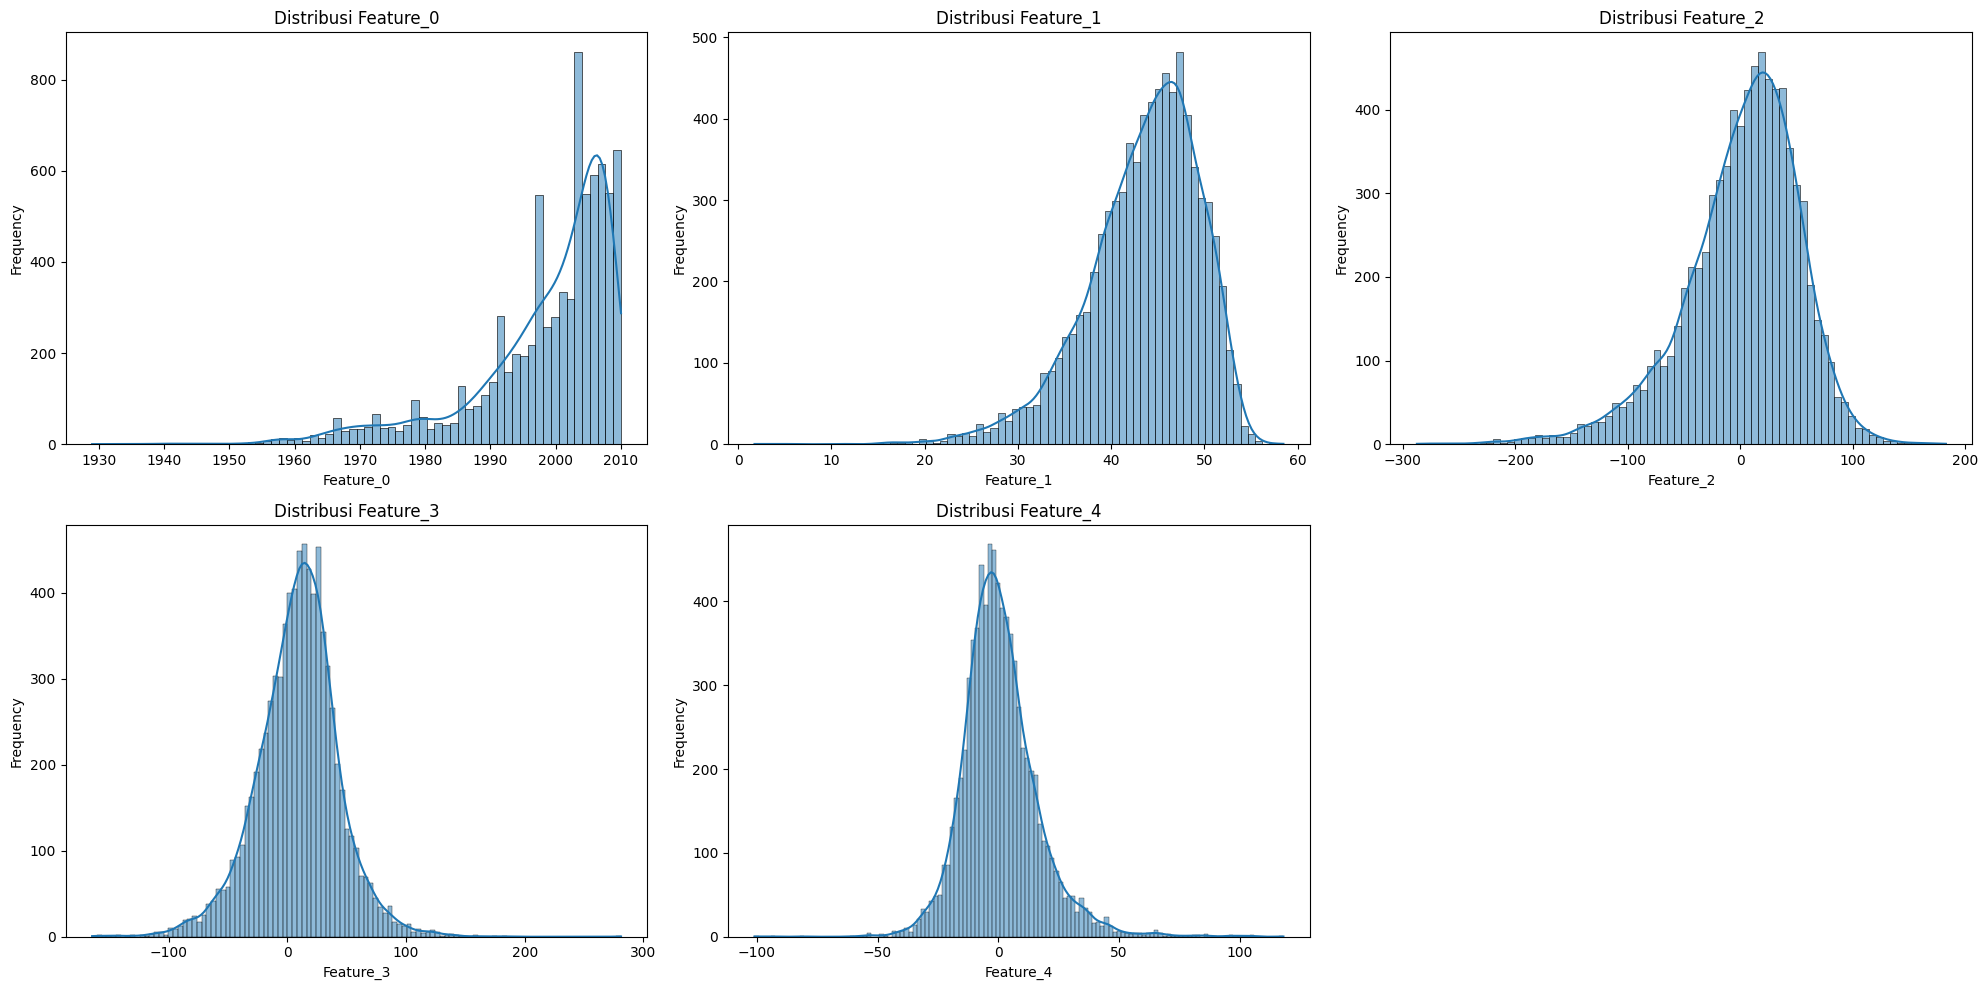

In [75]:
# Visualisasi dasar untuk memahami distribusi data dari 5 fitur pertama
features_to_plot = [f'Feature_{i}' for i in range(5)]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_sample[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Insight : Dari visualisasi distribusi, Feature_0 menunjukkan pola distribusi yang meningkat secara bertahap . Sementara itu, Feature_1 hingga Feature_4 memiliki pola distribusi yang menyerupai distribusi normal dengan berbagai rata-rata dan penyebaran. Feature_2, misalnya, memiliki distribusi yang lebih simetris dibandingkan dengan Feature_3 dan Feature_4, yang menunjukkan variasi data yang lebih terkonsentrasi di sekitar nilai rata-rata.

Prompt: Membuat heatmap untuk melihat korelasi antar fitur numerik

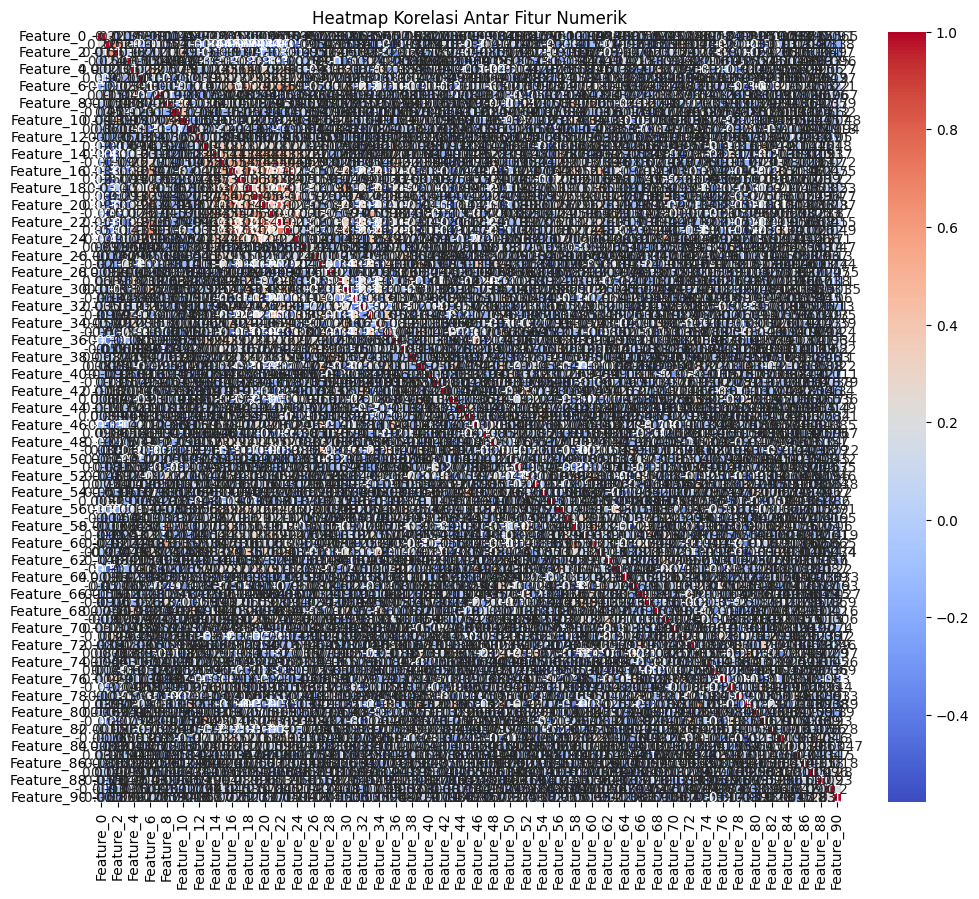

In [76]:
# Visualisasi heatmap untuk melihat korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df_sample.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Insight : Dari heatmap korelasi antar fitur, terlihat bahwa beberapa fitur memiliki korelasi tinggi (ditandai dengan warna merah yang mendekati 1), sementara yang lain menunjukkan korelasi rendah atau bahkan negatif (berwarna biru). 

# Pipeline

Prompt: Buatkan code untuk membagi dataset menjadi data pelatihan dan pengujian untuk evaluasi model

In [77]:
# Membagi dataset menjadi data pelatihan dan pengujian
X = df_sample.drop(columns=[f'Feature_{df_sample.shape[1] - 1}'])  # Menggunakan semua fitur kecuali fitur terakhir sebagai fitur input
y = df_sample[f'Feature_{df_sample.shape[1] - 1}']  # Menggunakan fitur terakhir sebagai target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi tentang data pelatihan dan pengujian
print("\nJumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))



Jumlah data pelatihan: 6400
Jumlah data pengujian: 1600


Insight : Dataset telah dibagi menjadi 6400 data untuk pelatihan dan 1600 data untuk pengujian, yang sesuai dengan rasio umum 80:20. Proporsi ini memastikan model memiliki cukup data untuk belajar (training) sekaligus menyediakan data yang memadai untuk mengevaluasi performa (testing). 

Prompt : Buatkan code model Regression untuk membuat pipeline dengan scikit-learn untuk Polynomial/Basis Function, Decision Tree, k-NN, XGBoost Regressionn 

In [78]:
# Membuat pipeline model Regression

# 1. Polynomial Regression
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
print("\nPolynomial Regression - MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression - R^2:", r2_score(y_test, y_pred_poly))



Polynomial Regression - MSE: 2156.8145542277266
Polynomial Regression - R^2: -3.699270086618289


Insight : Hasil evaluasi Polynomial Regression menunjukkan nilai MSE (Mean Squared Error) sebesar 2156.81 dan R² (R-squared) sebesar -3.69. Nilai MSE yang tinggi mengindikasikan bahwa model memiliki kesalahan prediksi yang cukup besar pada data pengujian. Selain itu, nilai R² negatif menunjukkan bahwa model tidak mampu menjelaskan variansi data target dengan baik, bahkan performanya lebih buruk dibandingkan jika menggunakan rata-rata target sebagai prediksi. Hal ini bisa disebabkan oleh overfitting, pemilihan derajat polinomial yang tidak sesuai, atau fitur yang kurang relevan.

In [79]:
# 2. Decision Tree Regression
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
print("\nDecision Tree Regression - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regression - R^2:", r2_score(y_test, y_pred_dt))



Decision Tree Regression - MSE: 501.01313789677283
Decision Tree Regression - R^2: -0.09160801391387507


Insight : Hasil evaluasi Decision Tree Regression menunjukkan nilai MSE (Mean Squared Error) sebesar 501.01 dan R² (R-squared) sebesar -0.091. Nilai MSE yang lebih rendah dibandingkan Polynomial Regression menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih kecil. Namun, nilai R² yang negatif tetap mengindikasikan bahwa model tidak mampu menjelaskan variansi data dengan baik, dan performanya lebih buruk dibandingkan prediksi menggunakan rata-rata target. 

In [80]:
# 3. k-NN Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
print("\nk-NN Regression - MSE:", mean_squared_error(y_test, y_pred_knn))
print("k-NN Regression - R^2:", r2_score(y_test, y_pred_knn))


k-NN Regression - MSE: 328.0115614035456
k-NN Regression - R^2: 0.2853280243555468


Insight : Hasil evaluasi k-NN Regression menunjukkan nilai MSE (Mean Squared Error) sebesar 328.01 dan R² (R-squared) sebesar 0.285. Nilai MSE yang lebih rendah dibandingkan Polynomial Regression dan Decision Tree Regression menunjukkan bahwa model ini memberikan prediksi dengan kesalahan yang lebih kecil. Selain itu, nilai R² yang positif (0.285) mengindikasikan bahwa model dapat menjelaskan sekitar 28.5% variansi data target, meskipun belum optimal. Performanya lebih baik dibandingkan model sebelumnya

In [81]:
# 4. XGBoost Regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Regression - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Regression - R^2:", r2_score(y_test, y_pred_xgb))


XGBoost Regression - MSE: 209.6474879756609
XGBoost Regression - R^2: 0.5432198067063536


Insight : Hasil evaluasi XGBoost Regression menunjukkan nilai MSE (Mean Squared Error) sebesar 209.65 dan R² (R-squared) sebesar 0.543. Nilai MSE yang paling rendah di antara model sebelumnya mengindikasikan bahwa XGBoost menghasilkan prediksi dengan kesalahan terkecil. Selain itu, nilai R² sebesar 0.543 menunjukkan bahwa model dapat menjelaskan sekitar 54.3% variansi dalam data target, menjadikannya model dengan performa terbaik

# Hyperparameter Tuning 

Prompt : Buatkan code untuk melakukan Hyperparameter Tuning dengan menggunakan GridSearchCV pada setiap model dan juga buatkan reportnya, buatkan code setelah bagian pipeline

In [82]:
# Hyperparameter Tuning dengan GridSearchCV

# 1. Polynomial Regression
param_grid_poly = {'poly_features__degree': [1, 2]}
grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring='r2', error_score='raise')
grid_search_poly.fit(X_train, y_train)
print("\nBest parameters for Polynomial Regression:", grid_search_poly.best_params_)
print("Best R^2 score for Polynomial Regression:", grid_search_poly.best_score_)



Best parameters for Polynomial Regression: {'poly_features__degree': 1}
Best R^2 score for Polynomial Regression: 0.3172688538431502


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Insight : Setelah dilakukan tuning hyperparameter, hasil terbaik untuk Polynomial Regression didapatkan dengan derajat polinomial (degree) sebesar 1, yang secara efektif sama dengan regresi linear. R² terbaik yang dicapai adalah 0.317, menunjukkan bahwa model mampu menjelaskan sekitar 31.7% variansi data target. Hasil ini menandakan bahwa derajat polinomial yang lebih tinggi justru menyebabkan overfitting, dan model sederhana seperti regresi linear lebih efektif untuk dataset ini. 

In [83]:
# 2. Decision Tree Regression
param_grid_dt = {'regressor__max_depth': [3, 5, 10], 'regressor__min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='r2', error_score='raise')
grid_search_dt.fit(X_train, y_train)
print("\nBest parameters for Decision Tree Regression:", grid_search_dt.best_params_)
print("Best R^2 score for Decision Tree Regression:", grid_search_dt.best_score_)


Best parameters for Decision Tree Regression: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5}
Best R^2 score for Decision Tree Regression: 0.24964402236571726


Insight : Setelah dilakukan tuning hyperparameter, model Decision Tree Regression mencapai performa terbaik dengan parameter max_depth = 5 dan min_samples_split = 5. Nilai R² terbaik adalah 0.249, menunjukkan bahwa model ini mampu menjelaskan sekitar 24.9% variansi data target. Meskipun performanya meningkat dibandingkan sebelumnya, model ini masih kurang optimal dibandingkan dengan model lain seperti XGBoost. 

In [84]:
# 3. k-NN Regression
param_grid_knn = {'regressor__n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='r2', error_score='raise')
grid_search_knn.fit(X_train, y_train)
print("\nBest parameters for k-NN Regression:", grid_search_knn.best_params_)
print("Best R^2 score for k-NN Regression:", grid_search_knn.best_score_)



Best parameters for k-NN Regression: {'regressor__n_neighbors': 7}
Best R^2 score for k-NN Regression: 0.31401369267170043


Insight : Setelah tuning hyperparameter, model k-NN Regression mencapai performa terbaik dengan parameter n_neighbors = 7, menghasilkan R² sebesar 0.314. Ini menunjukkan bahwa model mampu menjelaskan sekitar 31.4% variansi data target, yang lebih baik dibandingkan Decision Tree tetapi masih kalah dibandingkan XGBoost. Parameter ini menunjukkan bahwa mempertimbangkan 7 tetangga terdekat memberikan keseimbangan optimal antara underfitting dan overfitting. 

In [85]:
# 4. XGBoost Regression
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='r2', error_score='raise')
grid_search_xgb.fit(X_train, y_train)
print("\nBest parameters for XGBoost Regression:", grid_search_xgb.best_params_)
print("Best R^2 score for XGBoost Regression:", grid_search_xgb.best_score_)



Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best R^2 score for XGBoost Regression: 0.6357064228285454


Insight : Setelah tuning hyperparameter, model XGBoost Regression mencapai performa terbaik dengan parameter learning_rate = 0.1, max_depth = 3, dan n_estimators = 200, menghasilkan nilai R² = 0.636. Ini menunjukkan bahwa XGBoost mampu menjelaskan sekitar 63.6% variansi dalam data target, menjadikannya model dengan performa terbaik dibandingkan model lainnya. Hyperparameter yang digunakan menunjukkan bahwa kombinasi kedalaman pohon yang moderat (max_depth = 3) dan jumlah estimator yang cukup banyak (n_estimators = 200) memberikan hasil optimal.

KESIMPULAN 

Berdasarkan evaluasi dan tuning hyperparameter, model XGBoost Regression memberikan performa terbaik dengan nilai R² sebesar 0.635 dan MSE terendah dibandingkan dengan Polynomial Regression, Decision Tree Regression, dan k-NN Regression. Hal ini menunjukkan bahwa XGBoost mampu menangkap pola kompleks dalam data dengan baik dan memiliki kemampuan generalisasi yang lebih baik dibandingkan model lainnya. Model ini mengungguli model lain berkat kombinasi hyperparameter optimal seperti learning_rate = 0.1, max_depth = 3, dan n_estimators = 200, yang menjaga keseimbangan antara bias dan variansi.

Meskipun Polynomial Regression dan k-NN Regression memiliki R² yang lebih rendah, tuning hyperparameter berhasil meningkatkan performa kedua model tersebut, dengan k-NN mencapai R² sebesar 0.314. Decision Tree Regression memiliki performa yang relatif rendah meskipun setelah tuning, dengan R² hanya 0.249. Berdasarkan analisis ini, XGBoost adalah model yang paling direkomendasikan untuk dataset ini, terutama jika diperlukan prediksi dengan akurasi tinggi. 